# Instapaper Reading Data Analysis

Data Analysis and Data Visualization of Articles Read in Instapaper!

NOTE: To use, first run [instapaper_downloader.ipynb](https://github.com/markwk/qs_ledger/blob/master/instapaper/instapaper_downloader.ipynb) to download your bookmarkers, read articles and highlights data.

-----

## Dependencies

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

----

## Get Our Data

In [2]:
# unread articles
articles_unread = pd.read_csv('data/instapaper_unread.csv')

# articles read
articles_read = pd.read_csv('data/instapaper_read.csv')

# articles read
highlights = pd.read_csv('data/instapaper_highlights.csv')

In [3]:
articles = pd.concat([articles_read, articles_unread], sort=False)

In [4]:
print("===== Instapaper Stats =====")
print('{:,} total articles'.format(len(articles)))
print('{:,} total articles read'.format(len(articles_read)))
print('{:,} total articles unread'.format(len(articles_unread)))

===== Instapaper Stats =====
719 total articles
500 total articles read
219 total articles unread


----

## All Articles: Data Analysis

In [5]:
# convert with pd.to_datetime
articles['time'] = pd.to_datetime(articles['time']) # when article added 
articles = articles.rename(columns={'time': 'added_timestamp'})
articles['progress_timestamp'] = pd.to_datetime(articles['progress_timestamp']) # when article reading progress updated
# QUESTION: why is there no read date or time? 

In [6]:
# date addition of when article added
articles['added_date'] = articles['added_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient

# time dimensions for progress_timestamp which we can assume as when read? 
articles['progress_date'] = articles['progress_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
articles['year'] = articles['progress_timestamp'].dt.year
articles['month'] = articles['progress_timestamp'].dt.month
articles['mnth_yr'] = articles['progress_timestamp'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
articles['day'] = articles['progress_timestamp'].dt.day
articles['dow'] = articles['progress_timestamp'].dt.weekday
articles['hour'] = articles['progress_timestamp'].dt.hour

In [7]:
articles_added_per_day = articles['added_date'].value_counts().sort_index()
articles_added_per_day.columns = ['Date', 'Count']
articles_added_per_day = pd.DataFrame(articles_added_per_day)
articles_added_per_day['Date'] = articles_added_per_day.index.values
articles_added_per_day.columns = ['Count', 'Date']
articles_added_per_day = articles_added_per_day[['Date', 'Count']]
articles_added_per_day['Date'] = pd.to_datetime(articles_added_per_day['Date'])

In [8]:
# Generage Range of Dates from First Article added to Today
first_article_date = articles_added_per_day.head(1).index.values[0]
last_article_date = articles_added_per_day.tail(1).index.values[0]
# today = dt.today().strftime('%Y-%m-%d')
all_dates = pd.date_range(start=first_article_date, end=last_article_date)
all_dates = pd.DataFrame(all_dates, columns=['Date'])

In [9]:
# combine actual counts with total dates possible
articles_added_dates = pd.merge(left=all_dates, right=articles_added_per_day, left_on="Date", right_on="Date", how="outer")
articles_added_dates['Count'].fillna(0, inplace=True)
# article_dates.tail()
# len(articles_added_dates)

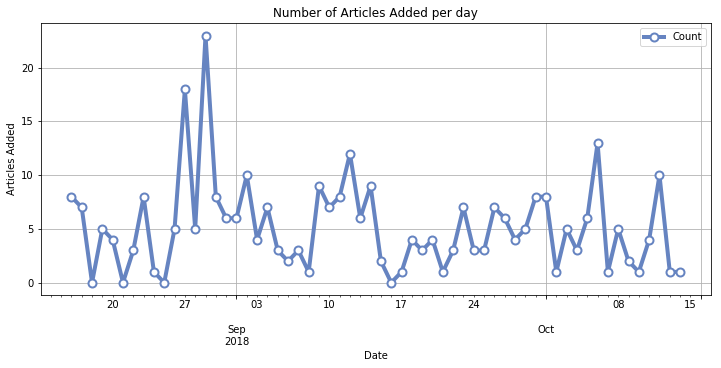

In [10]:
# a bit of a hackish solution, could use improvement
dataset = articles_added_dates.tail(60)
chart_title = 'Number of Articles Added per day'

# n_groups = len(dataset)
# index = np.arange(n_groups)

ax = dataset.plot(
    x="Date", y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
# ax.set_xticks()
ax.set_ylabel('Articles Added')
# ax.set_xlabel('')
# plt.xticks(index, dataset.Date, rotation=90)
ax.set_title(chart_title)

plt.show()

-----

## Articles Read: Data Processsing

In [11]:
articles_read = articles[(articles.progress_timestamp != '1970-01-01 07:30:00') & (articles.read_status == 'read')]

In [12]:
# count of date read
articles_read_per_day = articles_read['progress_date'].value_counts().sort_index()
articles_read_per_day.columns = ['Date', 'Count']
articles_read_per_day = pd.DataFrame(articles_read_per_day)
articles_read_per_day['Date'] = articles_read_per_day.index.values
articles_read_per_day.columns = ['Count', 'Date']
articles_read_per_day = articles_read_per_day[['Date', 'Count']]
articles_read_per_day['Date'] = pd.to_datetime(articles_read_per_day['Date'])

In [13]:
# Generage Range of Dates from First Article read to Today
first_article_date = articles_read_per_day.head(1).index.values[0]
last_article_date = articles_read_per_day.tail(1).index.values[0]
# today = dt.today().strftime('%Y-%m-%d')
all_dates = pd.date_range(start=first_article_date, end=last_article_date)
all_dates = pd.DataFrame(all_dates, columns=['Date'])

In [14]:
articles_read_dates = pd.merge(left=all_dates, right=articles_read_per_day, left_on="Date", right_on="Date", how="outer")
articles_read_dates['Count'].fillna(0, inplace=True)
# articles_read_dates.tail()

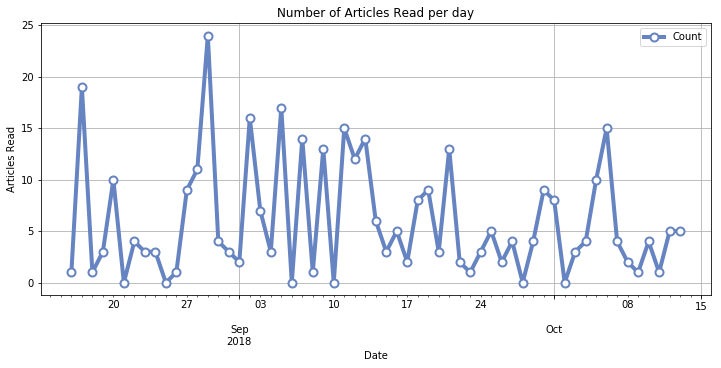

In [15]:
# a bit of a hackish solution, could use improvement
dataset = articles_read_dates.tail(60)
chart_title = 'Number of Articles Read per day'

#n_groups = len(dataset)
# index = np.arange(n_groups)

ax = dataset.plot(
    x="Date", y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
# ax.set_xticks(index)
ax.set_ylabel('Articles Read')
# ax.set_xlabel('')
# plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Analysis by Year

In [16]:
year_counts = articles_read['year'].value_counts().sort_index()
year_counts

2018    351
Name: year, dtype: int64

/Users/markkoester/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018, right=2018
  'left=%s, right=%s') % (left, right))


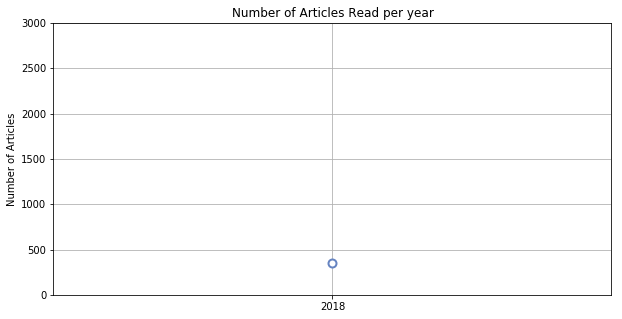

In [17]:
dataset = year_counts
chart_title = 'Number of Articles Read per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 3000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Articles')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis: Articles Read

In [18]:
month_counts = articles_read['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Month', 'Count']

month_counts = pd.DataFrame(month_counts)
month_counts['Month'] = month_counts.index.values
month_counts.columns = ['Count', 'Month']
month_counts = month_counts[['Month', 'Count']]
month_counts['Month'] = pd.to_datetime(month_counts['Month'])
month_counts.tail()

,Month,Count
2018-08,2018-08-01,96
2018-09,2018-09-01,193
2018-10,2018-10-01,62


In [19]:
# Generage Range of Months from First Article read to Today
first_article_month = month_counts.head(1).index.values[0]
last_article_month = month_counts.tail(1).index.values[0]
# today = dt.today().strftime('%Y-%m-%d')
all_months = pd.date_range(start=first_article_month, end=last_article_month, freq='MS')
all_months = pd.DataFrame(all_months, columns=['Month'])

In [20]:
# count of date read
articles_read_per_day = articles_read['progress_date'].value_counts().sort_index()
articles_read_per_day.columns = ['Date', 'Count']
articles_read_per_day = pd.DataFrame(articles_read_per_day)
articles_read_per_day['Date'] = articles_read_per_day.index.values
articles_read_per_day.columns = ['Count', 'Date']
articles_read_per_day = articles_read_per_day[['Date', 'Count']]
articles_read_per_day['Date'] = pd.to_datetime(articles_read_per_day['Date'])

In [21]:
# combine actual counts with total months 
total_months = pd.merge(left=all_months, right=month_counts, left_on="Month", right_on="Month", how="outer")
total_months['Count'].fillna(0, inplace=True)
total_months['Month Text'] = total_months['Month'].dt.strftime('%Y-%m')
# total_months.tail(20)
# len(total_months)

In [22]:
# maximum articles read in a month
max_per_month = total_months['Count'].max()
print('Most articles read in a month: {:,}'.format(max_per_month))

Most articles read in a month: 193


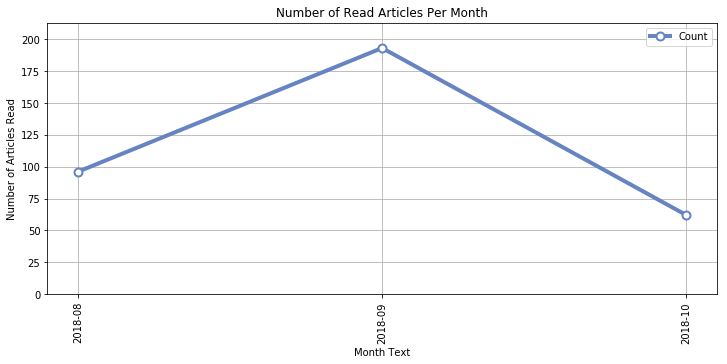

In [23]:
# a bit of a hackish solution, could use improvement
dataset = total_months.tail(35)
chart_title = 'Number of Read Articles Per Month'

n_groups = len(dataset)
index = np.arange(n_groups)

max_per_month = dataset['Count'].max()

ax = dataset.plot(
    x='Month Text', y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0,(max_per_month + 20))
# ax.set_xticks(index)
ax.set_ylabel('Number of Articles Read')
# ax.set_xlabel('')

# plt.xticks(rotation=90)
plt.xticks(index, dataset['Month Text'], rotation=90)
ax.set_title(chart_title)

plt.show()

-----

# Word Cloud of Given Title in Articles Read

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [25]:
stopwords = set(STOPWORDS)

In [26]:
# adjust accordingly
nsw = ["medium", "new", "york", "times", "NYTimes", "Forbes", "TED", "yorker", 
       "YouTube", "nan", "Wired", "Wikipedia", "free", "encyclopedia", "WikiTravel"] 
for i in nsw:
    stopwords.add(i)

In [27]:
words_in_title = ""

for index, row in articles_read.iterrows():
    if row["title"] != '':
        words_in_title =  words_in_title + " " + str(row["title"])

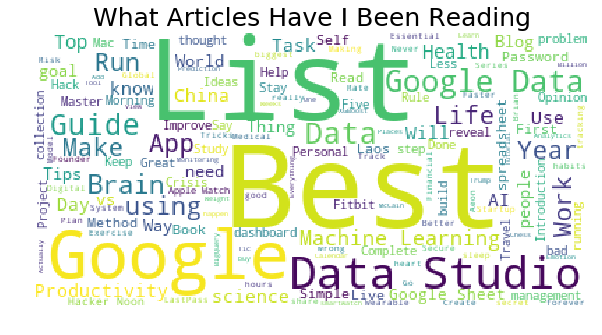

In [28]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_title)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Articles Have I Been Reading", fontsize=25)
plt.show()

----

# Words in Titles for a Single Year

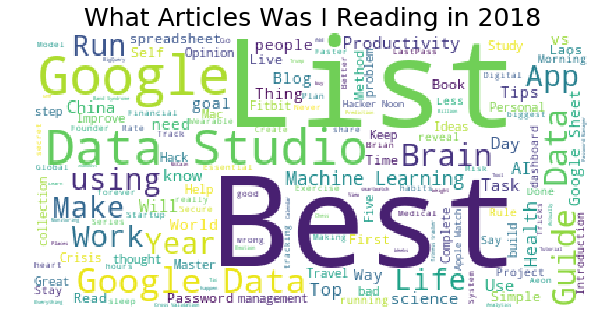

In [29]:
# Check For Single Year Only
check_year = 2018

words_in_title = ""

for index, row in articles_read[articles_read.year == check_year].iterrows():
    if row["title"] != '':
        words_in_title =  words_in_title + " " + str(row["title"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_title)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Articles Was I Reading in " + str(check_year), fontsize=25)
plt.show()

----

# Words in Titles for a Single Month

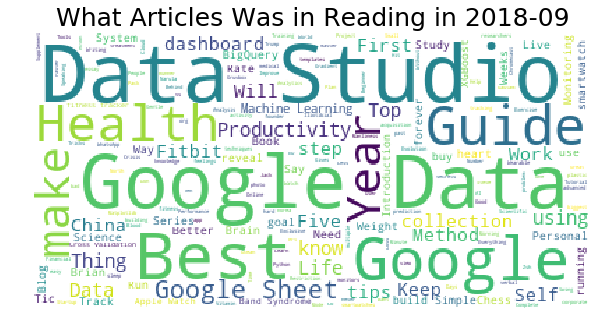

In [30]:
# Check For Single Year Only
check_month = "2018-09"

words_in_title = ""

for index, row in articles_read[articles_read.mnth_yr == check_month].iterrows():
    if row["title"] != '':
        words_in_title =  words_in_title + " " + str(row["title"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_title)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Articles Was in Reading in " + str(check_month), fontsize=25)
plt.show()

-----

## Highlights Analysis

In [31]:
# convert with pd.to_datetime
highlights['time'] = pd.to_datetime(highlights['time']) # when article added 
highlights = highlights.rename(columns={'time': 'highlight_timestamp'})

In [32]:
# time dimensions for progress_timestamp which we can assume as when read? 
highlights['highlight_date'] = highlights['highlight_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
highlights['year'] = highlights['highlight_timestamp'].dt.year
highlights['month'] = highlights['highlight_timestamp'].dt.month
highlights['mnth_yr'] = highlights['highlight_timestamp'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
highlights['day'] = highlights['highlight_timestamp'].dt.day
highlights['dow'] = highlights['highlight_timestamp'].dt.weekday
highlights['hour'] = highlights['highlight_timestamp'].dt.hour

### Number of Monthly Highlights 

In [33]:
month_counts = highlights['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Month', 'Count']

month_counts = pd.DataFrame(month_counts)
month_counts['Month'] = month_counts.index.values
month_counts.columns = ['Count', 'Month']
month_counts = month_counts[['Month', 'Count']]
month_counts['Month'] = pd.to_datetime(month_counts['Month'])
month_counts.tail()

,Month,Count
2018-08,2018-08-01,71
2018-09,2018-09-01,185
2018-10,2018-10-01,29


### Number of Highlights per Day

In [34]:
highlights_added_per_day = highlights['highlight_date'].value_counts().sort_index()
highlights_added_per_day.columns = ['Date', 'Count']
highlights_added_per_day = pd.DataFrame(highlights_added_per_day)
highlights_added_per_day['Date'] = highlights_added_per_day.index.values
highlights_added_per_day.columns = ['Count', 'Date']
highlights_added_per_day = highlights_added_per_day[['Date', 'Count']]
highlights_added_per_day['Date'] = pd.to_datetime(highlights_added_per_day['Date'])

In [35]:
# Generage Range of Dates from First Highlight added to Today
first_highlight_date = highlights_added_per_day.head(1).index.values[0]
last_highlight_date = highlights_added_per_day.tail(1).index.values[0]
all_dates = pd.date_range(start=first_highlight_date, end=last_highlight_date)
all_dates = pd.DataFrame(all_dates, columns=['Date'])

In [36]:
# combine actual counts with total dates possible
highlights_added_dates = pd.merge(left=all_dates, right=highlights_added_per_day, left_on="Date", right_on="Date", how="outer")
highlights_added_dates['Count'].fillna(0, inplace=True)
# article_dates.tail()
# len(articles_added_dates)

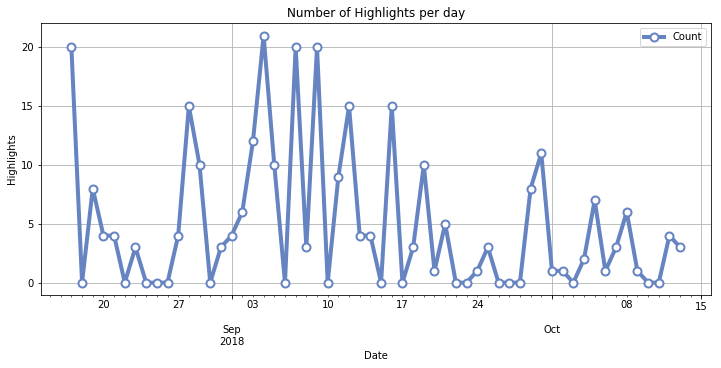

In [37]:
# a bit of a hackish solution, could use improvement
dataset = highlights_added_dates.tail(60)
chart_title = 'Number of Highlights per day'

# n_groups = len(dataset)
# index = np.arange(n_groups)

ax = dataset.plot(
    x="Date", y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
# ax.set_xticks()
ax.set_ylabel('Highlights')
# ax.set_xlabel('')
# plt.xticks(index, dataset.Date, rotation=90)
ax.set_title(chart_title)

plt.show()

## Word Cloud of Text in Highlights

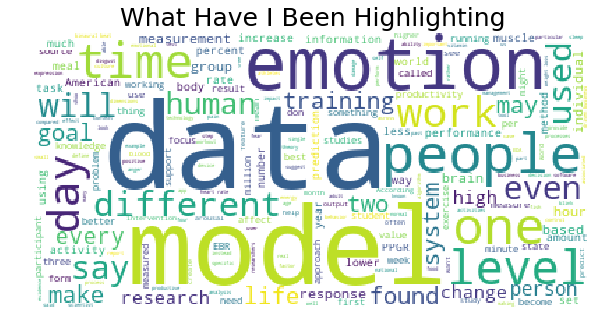

In [38]:
words_in_highlights = ""

for index, row in highlights.iterrows():
    if row["text"] != '':
        words_in_highlights =  words_in_highlights + " " + str(row["text"])
        
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_highlights)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Have I Been Highlighting", fontsize=25)
plt.show()

## Word Cloud of Text in Highlights for a Single Month

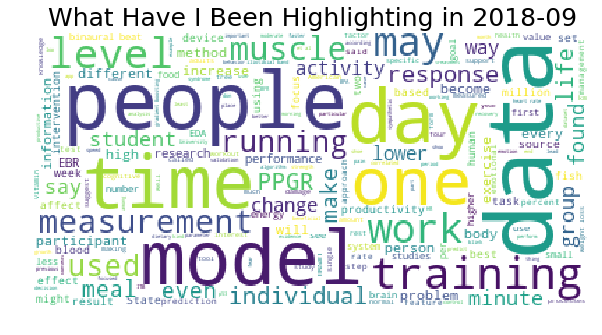

In [39]:
# Check For Single Month Only
check_month = "2018-09"

words_in_highlights = ""

for index, row in highlights[highlights.mnth_yr == check_month].iterrows():
    if row["text"] != '':
        words_in_highlights =  words_in_highlights + " " + str(row["text"])
        
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_highlights)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Have I Been Highlighting in " + str(check_month), fontsize=25)
plt.show()